In [1]:
# 掉入库
import skimage

In [2]:
# 调库skimage库中的自带的图片
from skimage import data
camera = data.camera()

In [3]:
# 图像的数据格式
type(camera)

numpy.ndarray

In [4]:
# 图像的大小
camera.shape
# # An image with 512 rows and 512 columns

(512, 512)

In [5]:
# skimage.data子模块提供了一组返回示例图像的函数，可用于快速开始使用scikit-image的函数

coins = data.coins()
# filters模块介绍之边缘检测的实现
from skimage import filters

threshold_value = filters.threshold_otsu(coins)
threshold_value

107

## 可以使用skimage.io.imread（）从图像文件将您自己的图像作为NumPy数组加载：

In [8]:
import os
from skimage import io

filename = os.path.join(skimage.data_dir,'moon.png')
moon = io.imread(filename)
moon.shape

(512, 512)

## 使用natsort加载多个图像

In [10]:
import os
from natsort import natsorted,ns
from skimage import io
list_files = os.listdir('.')
list_files

['.ipynb_checkpoints', 'Untitled.ipynb']

In [11]:
list_files = natsorted(list_files)
list_files

['.ipynb_checkpoints', 'Untitled.ipynb']

# NumPy速成班图像

In [12]:
from skimage import data
camera = data.camera()
# 图像的形状
print(camera.shape)
# 图像的体积 像素数量
print(camera.size)

(512, 512)
262144


In [13]:
# 检索有关图像强度值的统计信息：
print(camera.min(),camera.max())
# 图像的强度的平均值
print(camera.mean())

0 255
118.31400299072266


In [14]:
# NumPy索引可用于查看像素值并进行修改：
camera[10,20]

153

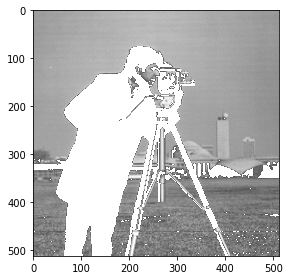

In [20]:
# 遮罩（使用布尔掩码进行索引）：
from skimage import io
mask = camera<87
camera[mask]=255
io.imshow(camera)


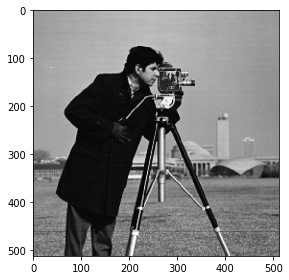

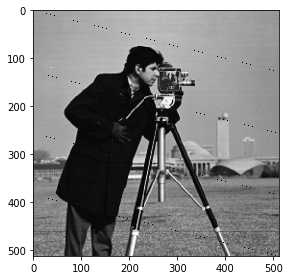

In [23]:
import numpy as np
camera = data.camera()
io.imshow(camera)
io.show()
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r %len(camera)
camera[inds_r, inds_c] = 0
io.imshow(camera)

In [34]:
"""
当您需要选择一组像素进行操作时，遮罩非常有用。 
遮罩可以是与图像具有相同形状（或可广播到图像形状的形状）
的任何布尔数组。
这可以用来定义感兴趣的区域，例如磁盘：
"""
camera = data.camera()
nrows,ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row,cnt_col = nrows/2,ncols/2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 ,...,(nrows / 2)**2)
camera[outer_disk_mask] = 0
io.imshow(camera)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

(300, 451, 3)

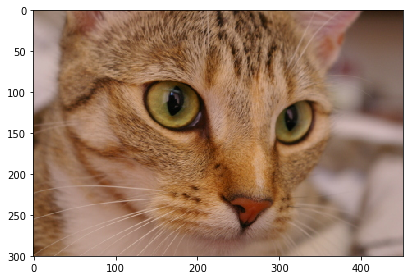

In [36]:
cat = data.chelsea()
io.imshow(cat)
cat.shape

### 这表明cat是具有三个通道（红色，绿色和蓝色）的300 x 451像素的图像。和以前一样，我们可以获取并设置像素值：

In [37]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

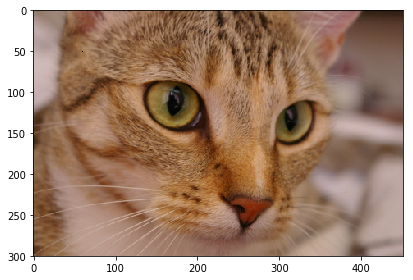

In [38]:
cat[50, 60] = 0
io.imshow(cat)

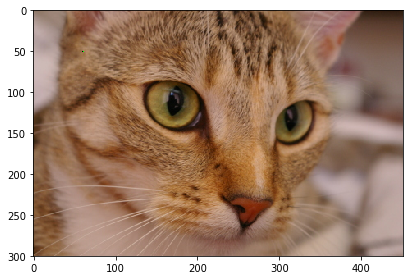

In [39]:
cat[50, 61] = [0, 255, 0] 
io.imshow(cat)

### 我们也可以为2D多通道图像使用2D布尔蒙版，就像上面的灰度图像一样：

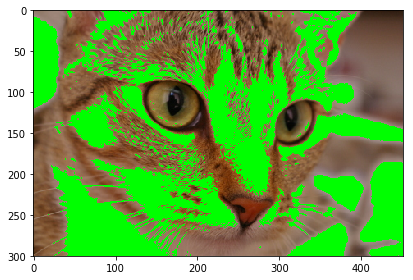

In [43]:
from skimage import data
import matplotlib.pyplot as plt
from skimage import io
cat = data.chelsea()
reddish = cat[:,:,0]>160
cat[reddish]=[0,255,0]
io.imshow(cat)

## Coordinate conventions(坐标约定)
* 因为scikit-image 使用Numpy 数组表示图像，所以约定必须匹配
* 二维（2D）灰度图像由行和列（【row,col】）或（【r，c】）索引，而最低元素（0,0）
在顶部（左上角）.
* 在库的各个部分，您还将看到rr和cc指的是行和列坐标的列表。我们将此约定与（x，y）区别开来，后者通常表示标准的直角坐标，其中x是水平坐标，y-垂直坐标，并且原点位于左下角（例如，Matplotlib轴使用此约定） 。
* 在多通道图像的情况下，最后一个尺寸用于彩色通道，并由通道或通道表示。最后，对于体积（3D）图像，例如视频，磁共振成像（MRI）扫描，共聚焦显微镜等，我们将前导尺寸称为平面，缩写为pln或p。这些约定总结如下：scikit-image中的维度名称和顺序约定

### scikit-image中的尺寸名称和顺序约定
|Image type|Coordinates|
|-----------|-----------|
|2D grayscale|(row, col)|
|2D multichannel (eg. RGB)|(row, col, ch)|
|3D grayscale|(pln, row, col)|
|3D multichannel|(pln, row, col, ch)|

### scikit-image 提供了许多直接操控3D图像的功能


In [49]:
from skimage import morphology,io
from scipy import ndimage as ndi

# im3d = np.random.rand(10,210,10000)
# io.imshow(im3d)
# io.show()
# seeds = ndi.label(im3d<0.1)[0]
# ws = morphology.watershed(im3d, seeds)
# io.imshow(ws)

### combine_stains
* skimage.color.combine_stains(stains, conv_matrix)
* 参数
* * stains：array_like在染色色空间中的图像，形状为三维阵列（..，..，3）。conv_matrix：ndarray G. Landini R47描述的染色分离矩阵。
* 返回：
* * out：ndarray RGB形式的图像，形状为三维阵列（..，..，3）。
* 举：
* * ValueError如果污渍不是形状的三维阵列（..，..，3）。

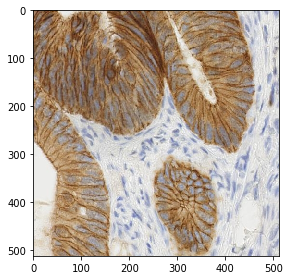

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


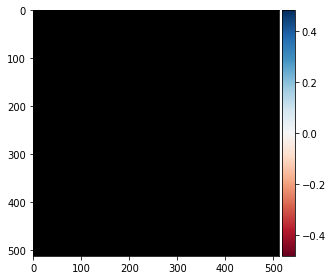

[[[-0.43354799 -0.272706   -0.16187122]
  [-0.43760298 -0.27740686 -0.16355473]
  [-0.43259873 -0.27267329 -0.16350392]
  ...
  [-0.37880293 -0.39173657 -0.16465729]
  [-0.39244504 -0.39450374 -0.16831727]
  [-0.40667875 -0.40237215 -0.17157009]]

 [[-0.4236264  -0.26586722 -0.15766698]
  [-0.42541098 -0.26792785 -0.15840934]
  [-0.42217118 -0.26581708 -0.16016991]
  ...
  [-0.38673102 -0.39758651 -0.1674773 ]
  [-0.39115079 -0.39352618 -0.16785323]
  [-0.39839188 -0.39470983 -0.16805667]]

 [[-0.4112426  -0.26168105 -0.15339888]
  [-0.41552347 -0.26653136 -0.15517002]
  [-0.41887511 -0.26947811 -0.15796608]
  ...
  [-0.39346551 -0.39964188 -0.16798923]
  [-0.39076049 -0.39022592 -0.16579052]
  [-0.39244828 -0.38744998 -0.16486923]]

 ...

 [[-0.44791437 -0.37484876 -0.17160483]
  [-0.45074192 -0.37742014 -0.17273559]
  [-0.4552268  -0.38149719 -0.17452878]
  ...
  [-0.43969241 -0.37663462 -0.17026245]
  [-0.44072118 -0.37579172 -0.17224157]
  [-0.44244953 -0.37733295 -0.17291827]]

 [

In [58]:
from skimage import data,io
from skimage.color import (separate_stains, combine_stains,hdx_from_rgb, rgb_from_hdx)

ihc = data.immunohistochemistry()
io.imshow(ihc)
io.show()
ihc_hdx = separate_stains(ihc, hdx_from_rgb)
io.imshow(ihc_hdx)
io.show()
print(ihc_hdx)

## convert_colorspace
* 将图像数组转换为新的颜色空间。
* 参数：
* * arr：array_like要转换的图像。
* * fromspace：str要从其转换的颜色空间。有效的颜色空间字符串是'RGB'，'HSV'，'RGB CIE'，'XYZ'，'YUV'，'YIQ'，'YPbPr'，'YCbCr'。值也可以指定为小写。
* * tospace：str要转换为的颜色空间。有效的颜色空间字符串是'RGB'，'HSV'，'RGB CIE'，'XYZ'，'YUV'，'YIQ'，'YPbPr'，'YCbCr'。值也可以指定为小写。
* 返回
* * newarr：ndarray转换后的图像。

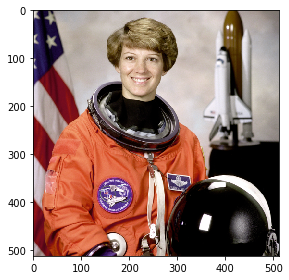

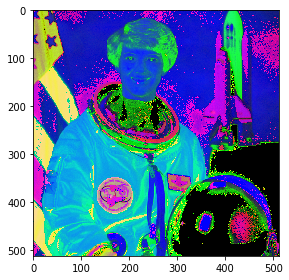

In [61]:
from skimage import data,color
img = data.astronaut()
io.imshow(img)
io.show()
img_hsv = color.convert_colorspace(img, 'RGB', 'HSV')
io.imshow(img_hsv)

## deltaE_cie76
* Lab颜色空间中两点之间的欧几里德距离
* 参数
* * 	
lab1：array_like参考色（Lab色彩空间）lab2：array_like比较色（Lab色彩空间）
* 返回
* * dE：颜色lab1和lab2之间的array_like距离